<span style="font-family: Arial; font-weight:bold;font-size:1.7em;color:#00b3e5;">  EXPLORATORY DATA ANALYSIS OF INSURANCE
    
**Data Description:**
The data at hand contains medical costs of people characterized by certain
 - Attributes.
 - Domain:
 - Healthcare

**Attribute Information:**
 - **age:** age of primary beneficiary
 - **sex:** insurance contractor gender, female, male
 - **bmi:** Body mass index, providing an understanding of body, weights that are
relatively high or low relative to height, objective index of body weight (kg / m ^
2) using the ratio of height to weight, ideally 18.5 to 24.9
 - **children:** Number of children covered by health insurance / Number of dependents
 - **smoker:** Smoking
 - **region:** the beneficiary's residential area in the US, northeast, southeast,southwest, northwest.
 - **charges:** Individual medical costs billed by health insurance.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">2.Load And Read the data as a data frame

In [2]:
#Load the insurance data.Since the file is present in my project dir, i have given the direct file name
insurance_data = pd.read_csv('insurance.csv')

#head() function on the variable to check whether the data has been fetched successfully or not
#Read the data from data insurance_data data frame. 
insurance_data.head()  #defualt it ll show top 5 rows of data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">3. Perform Basic EDA

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">a.  Shape of the data

In [3]:
# shape of the data
insurance_data.shape

(1338, 7)

**Details of shape of data:** 
- insurance data contains total **7 columns** and **1338 rows** 

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">b. Data type of each attribute

In [4]:
#To check the datatypes of each Attributes 
insurance_data.dtypes

###Note: insurance_data.info() also can be used for getting the detils information of each attrubutes, no.of rows, columns and nullable data info

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

**Details of each data type:**

- age, children : data type of these attributes are int64

- sex, smoker, region : data type of these attributes are object

- bmi, charges : data types of these attributes are float64    

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">c. Checking the presence of missing values

In [5]:
#Check the missing vlaue counts for each attributes
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**From Above reuslt it cleared, non of the attributes have missing values or NaN**

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">d. 5 Point summary of numerical attributes

**The five number summary helps describe the center, spread and shape of data. The five pointssummary are as follows:**
* Minimum
* Q1
* Q2
* Q3
* Maximum

In [6]:
#using describe() function we can check all the numberical data 5 pint summary with other information
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Above data showing the five point summary [min, 1st quartile, Median, 3rd quartile, Max] for numberical colums (age, bmi, children, charges)**
- 25% is the Q1 [ist Quartile]
- 50% is the Q2 [Median or 2nd Quartile]
- 75% is the Q3 [3rd Quartile]

#### Another way of calculating of 5 point summary of numberical attributes of individual attribute

In [7]:
def calFivePointSummary(data, attribute):
    data_set = data[attribute].sort_values()
    min = data_set.min()
    max = data_set.max()
    quartile_25 = np.quantile(data_set, .25)
    quartile_50 = np.quantile(data_set, 0.5)
    quartile_75 = np.quantile(data_set, .75)
    
    print ('---------------------------------------')
    print ('5 points summary of : '''+ attribute + ' attribute')
    print ('---------------------------------------')
    print (attribute+': Minimum                :', min,             
           '\n'+ attribute+ ': quartile_25%           :',quartile_25, 
           '\n' +attribute+ ': quartile_50% or Median :',quartile_50, 
           '\n'+ attribute+ ': quartile_75%           :',quartile_75,
           '\n'+ attribute+ ': Maximum                :',max, '\n')

In [8]:
calFivePointSummary(insurance_data, 'age')
calFivePointSummary(insurance_data, 'bmi')
calFivePointSummary(insurance_data, 'charges')
calFivePointSummary(insurance_data, 'children')

---------------------------------------
5 points summary of : age attribute
---------------------------------------
age: Minimum                : 18 
age: quartile_25%           : 27.0 
age: quartile_50% or Median : 39.0 
age: quartile_75%           : 51.0 
age: Maximum                : 64 

---------------------------------------
5 points summary of : bmi attribute
---------------------------------------
bmi: Minimum                : 15.96 
bmi: quartile_25%           : 26.29625 
bmi: quartile_50% or Median : 30.4 
bmi: quartile_75%           : 34.69375 
bmi: Maximum                : 53.13 

---------------------------------------
5 points summary of : charges attribute
---------------------------------------
charges: Minimum                : 1121.8739 
charges: quartile_25%           : 4740.28715 
charges: quartile_50% or Median : 9382.033 
charges: quartile_75%           : 16639.912515 
charges: Maximum                : 63770.42801 

---------------------------------------
5 points 

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

**Distribution of bmi column**

<AxesSubplot:title={'center':'Distribution of BMI'}, xlabel='bmi', ylabel='Frequency'>

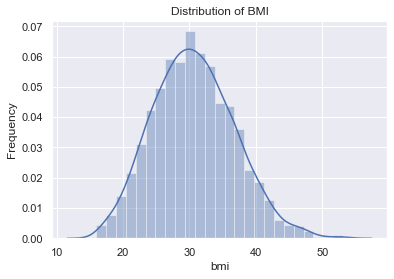

In [9]:
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
sns.distplot(insurance_data['bmi'])  #plot the frequency disctribution of the BMI data 

The BMI distribution is bell shaped and mostly symmetrical. Data distributed normally with very very little right skewness. 

**Distribution of Age column**

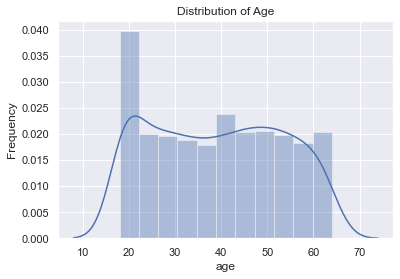

In [10]:
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
sns.distplot(insurance_data['age']);  #plot the frequency disctribution of the Age data 

The AGE distribution is mostly uniform, except for age below 25 histogram peak<br>
So it looks like age between 18 to 25 have more insurance claims compare to other age category.

**Distribution of charges column**

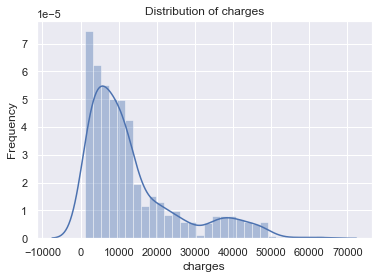

In [11]:
plt.title('Distribution of charges')
plt.xlabel('charges')
plt.ylabel('Frequency')
sns.distplot(insurance_data['charges']);  #plot the frequency disctribution of the charges data 

The Charges distribution is skewed towards right.<br>Most of data points cluster arround below 20000. So more number of claims charges is below 20000.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [12]:
#find the skewness of BMI
bmi_skew = insurance_data['bmi'].skew()
age_skew = insurance_data['age'].skew()
charges_skew = insurance_data['charges'].skew()

print ('Measure of Skewness of BMI: ', bmi_skew )
print ('Measure of Skewness of AGE:', age_skew )
print ('Measure of Skewness of CHARGES:', charges_skew )

Measure of Skewness of BMI:  0.2840471105987448
Measure of Skewness of AGE: 0.05567251565299186
Measure of Skewness of CHARGES: 1.5158796580240388


*The atrributes **BMI,AGE** and **CHANGES** are **skewed towards right** whch indicates the tail on right side of the curve is longer than left side of the curve. The charges shows high skewness than BMI and AGE skews.*

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges'
columns

In [13]:
#define one function to calculate the outlier
def find_outlier(data, attribute):
    data_set=insurance_data[attribute].sort_values() #sort series in ascending order
    
    #1st Quartile Q1
    Q1 = data_set.quantile(0.25)
    
    #2nd Quartile Q2 (median)
    Q2 = data_set.quantile(0.50)
    
    #3rd Quartile Q2 
    Q3 = data_set.quantile(0.75)
    
    #Inter Quartile Range (IQR)
    IQR = Q3 - Q1
    
    #find the lower bound  Q1 - (1.5 * IQR)
    lower_bound = Q1 - (1.5 * IQR)
    
    #find the upper bound Q3 + (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    #Find the no.of data points below the lower bound
    l_bound_data_points = data_set[data_set.values < lower_bound].size
    
    #Find the no.of data points above the upper bound
    u_bound_data_points = data_set[data_set.values > upper_bound].size
    
    print ('Presense Of Outliers In ' + attribute.upper())
    print ('---------------------------')
    
    print ( attribute + ': Q3  :', Q3, 
           '\n'+ attribute+ ': Q1  :', Q1, 
           '\n'+ attribute+ ': IQR :', IQR, 
           '\n'+ attribute+ ': lower_bound : ', lower_bound, 
           '\n'+ attribute+ ': upper_bound : ', upper_bound)
    
    print (attribute + ': Any data point lies below : ', lower_bound , ' and above :', upper_bound,' is considered as outlier')
    print(attribute +': No.of data poits below lower bound:',l_bound_data_points ,' and data points above upper bound:', u_bound_data_points)
    


Presense Of Outliers In BMI
---------------------------
bmi: Q3  : 34.69375 
bmi: Q1  : 26.29625 
bmi: IQR : 8.3975 
bmi: lower_bound :  13.7 
bmi: upper_bound :  47.290000000000006
bmi: Any data point lies below :  13.7  and above : 47.290000000000006  is considered as outlier
bmi: No.of data poits below lower bound: 0  and data points above upper bound: 9


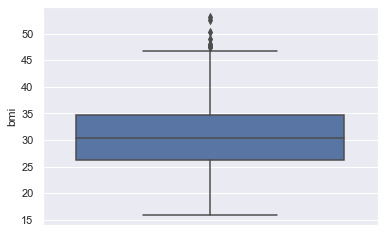

In [14]:
# Find the presence of outlier in BMI
find_outlier(insurance_data, 'bmi')

#box plot to check the outlier
sns.boxplot(y=insurance_data['bmi'], data=insurance_data['bmi']);

BMI has a few extreme values.

Presense Of Outliers In AGE
---------------------------
age: Q3  : 51.0 
age: Q1  : 27.0 
age: IQR : 24.0 
age: lower_bound :  -9.0 
age: upper_bound :  87.0
age: Any data point lies below :  -9.0  and above : 87.0  is considered as outlier
age: No.of data poits below lower bound: 0  and data points above upper bound: 0


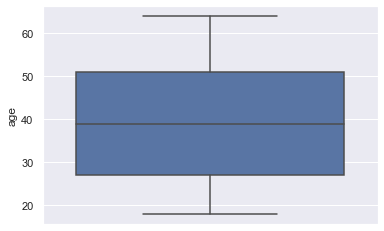

In [15]:
# Find the presence of outlier in AGE
find_outlier(insurance_data, 'age')

#box plot to check the outlier
sns.boxplot(y=insurance_data['age']);

No outliers presnet for age but from boxplot it looks like data uniformly distributed.

Presense Of Outliers In CHARGES
---------------------------
charges: Q3  : 16639.912515 
charges: Q1  : 4740.28715 
charges: IQR : 11899.625365 
charges: lower_bound :  -13109.1508975 
charges: upper_bound :  34489.350562499996
charges: Any data point lies below :  -13109.1508975  and above : 34489.350562499996  is considered as outlier
charges: No.of data poits below lower bound: 0  and data points above upper bound: 139


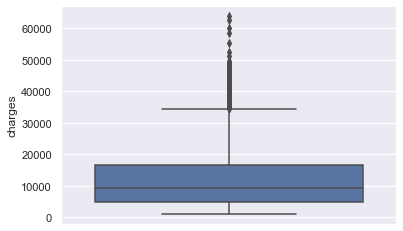

In [16]:
# Find the presence of outlier in chrges
find_outlier(insurance_data, 'charges')

#box plot to check the outlier
sns.boxplot(y=insurance_data['charges']);

Charges as it is highly skewed, there are quiet a lot of extreme values.

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">h. Distribution of categorical columns (include children) 

<AxesSubplot:title={'center':'Distribution of CHILDREN'}, xlabel='children', ylabel='Frequency'>

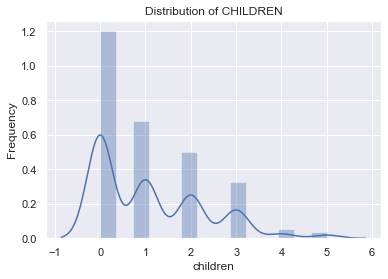

In [17]:
#Distribution of children data
plt.title('Distribution of CHILDREN')
plt.xlabel('Chidren')
plt.ylabel('Frequency')
sns.distplot(insurance_data['children'])

- From above distribution it looks like more people have no chidrens and most of have less than 2 chidrens and very few with 4 and 5.
- The data is right skewed.

###### In our Insurance data set we have three categorical columns sex, region and smoker.

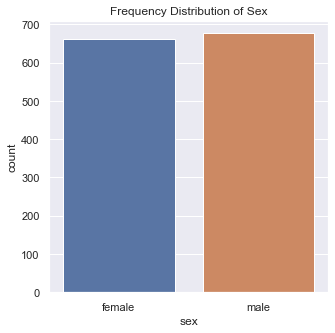

In [18]:
# Distribution os Sex
plt.figure(figsize=(5,5))
sns.countplot(data=insurance_data, x='sex');
plt.title('Frequency Distribution of Sex');

From countplot it looks more number of Male claim the insurance compare to Female

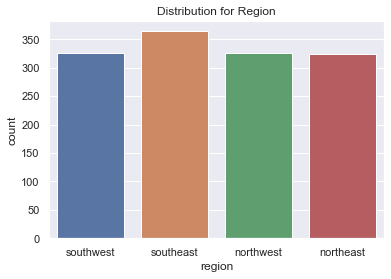

In [19]:
#Distribution of region
#plt.figure(figsize=(5,5))
sns.countplot(data=insurance_data, x = 'region');
plt.title('Distribution for Region');

From  above data it look like form Southest region people have more insurance claim. Rest of region no.of claims distributed evenly.

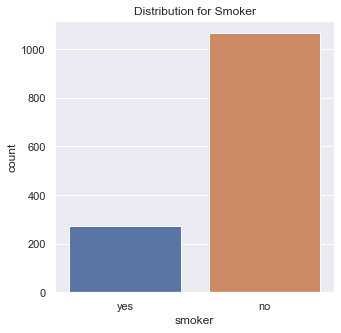

In [20]:
#Distribution for smoker
plt.figure(figsize=(5,5))
plt.title('Distribution for Smoker');
sns.countplot(data=insurance_data, x='smoker');


From above data it look like lot more non-smokers than there are smokers (arround less than 300 peoples are smoker and rest are non smoker).

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">i. Pair plot that includes all the columns of the data frame

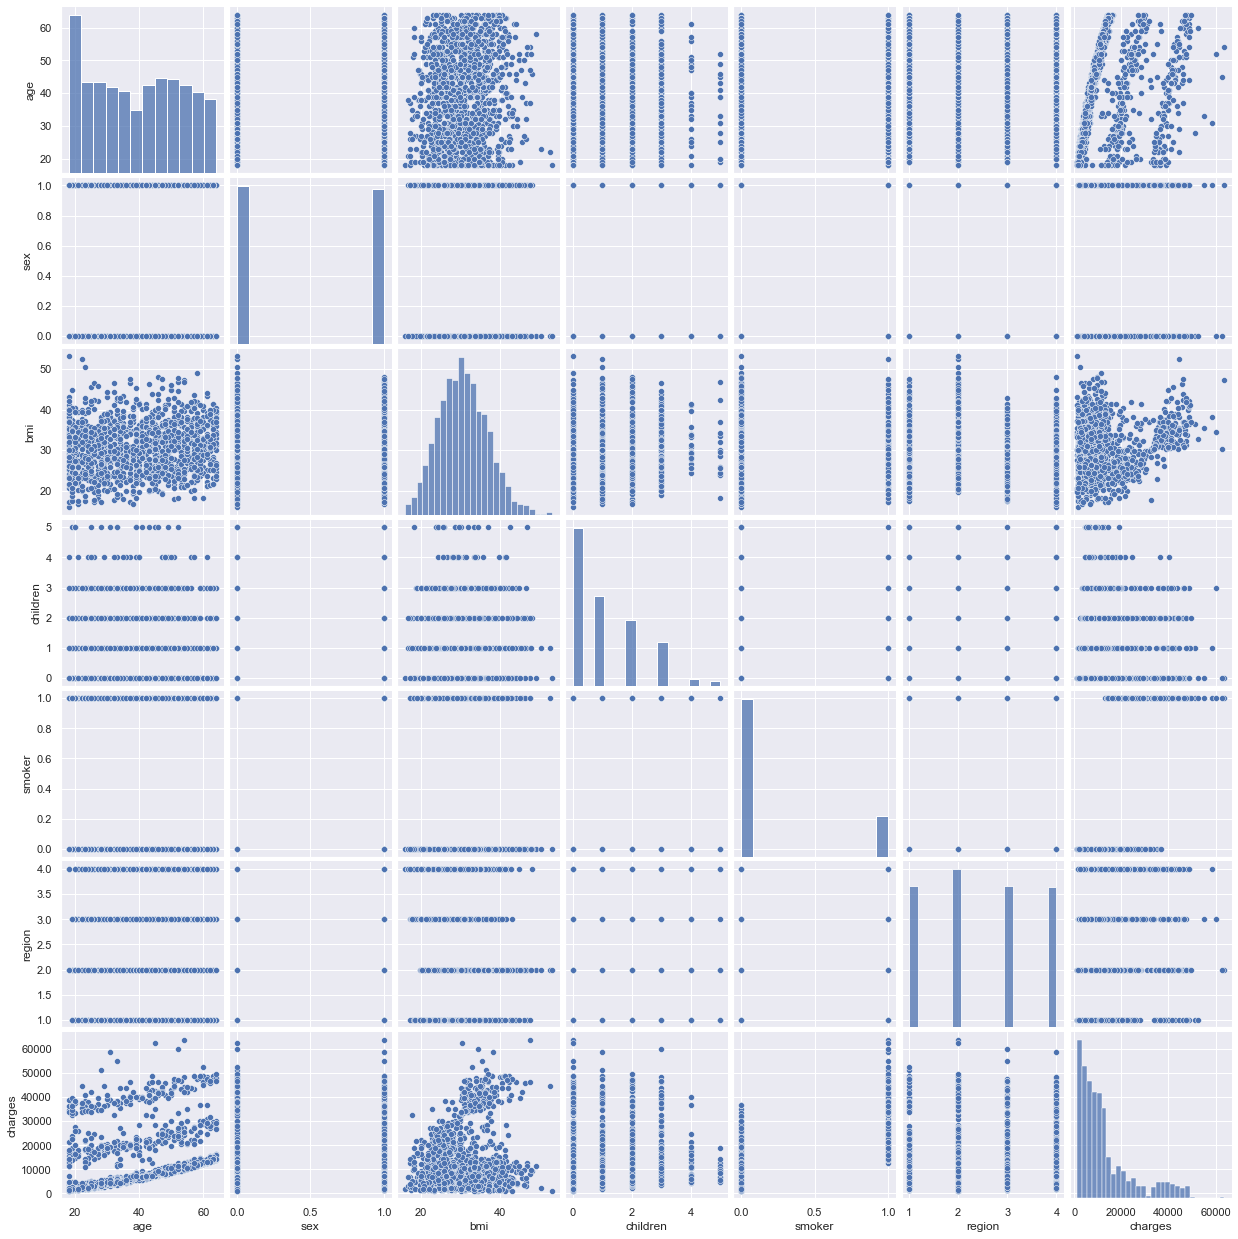

In [21]:
#Since some of the coloumn have categorical data we need to replace with some valid value to plot the pair plot
# smoker values replaced with yes = 0 and no = 1
df_smoker_replace = insurance_data.replace(to_replace =['no','yes'], value= [0,1])

# sex values replaced with  male = 0 and female = 1
df_sex_replace = df_smoker_replace.replace(to_replace=['male','female'], value=[0,1])

# region values replaced with southwest = 1, southeast = 2, northwest = 3 and northeast = 4
df_region_replace = df_sex_replace.replace(to_replace=['southwest','southeast','northwest','northeast'], value=[1,2,3,4])
sns.pairplot(df_region_replace);

**Aboe pairplot plot showing the  pairwise relationships in a dataset.**<br>
- All diagonal plot show the relationship with itself nothing but histogram
- The main aim to check the relation ship with each data set and how it distributed.

**Some Importand points we can keep our eye from the above plot:**
- We can see the people are more older the insurance claim charges is more.
- We can see people with higher BMI, the claim charges is little higher.
- Also we can see charges for the smoker is little higher than non smoker
- If we compare BMI with age, all age group have same distribution of BHI. Nothing age specific.
- chidren column have not much relation with other atributes.
- most of region have same claim charges except few expectional case the charges is little higher.


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 4. Answer the following questions with statistical evidence

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">a. Do charges of people who smoke differ significantly from the
people who don't?

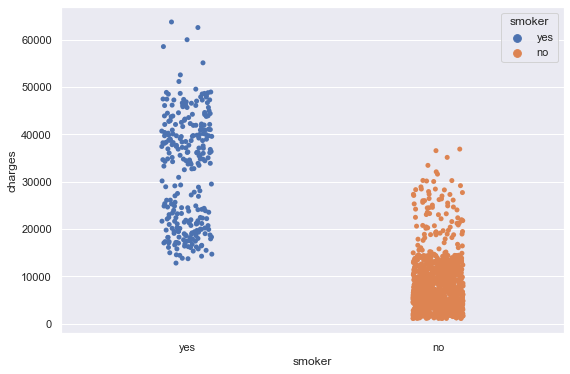

In [22]:
#do the plot and check the data varibility between charges and smkoers
plt.figure(figsize=(9,6))
sns.stripplot(data=insurance_data, x='smoker', y='charges', hue='smoker');

**From above plot it looks like people have smokes have more changes compare to non smoker. But is this statically significat need to do hypothesis testing to confirm.**

##### Analysis based on hypothesis test

In [23]:
# Null hypothesis (H0) = 'Charges of smoker and non-smoker are same'
# Alter native hypothesis (H1) = 'Charges of smoker and non-smoker are not the same'
# Consider 95% confidence level. So 5% significance level. Alpha = 0.05
# p_value < 0.05 => alternative hypothesis:

#charges for the smoker people
smoker_charges = np.array(insurance_data[insurance_data['smoker'] == 'yes']['charges'])

#charges for the non-smoker people
non_smoker_charges = np.array(insurance_data[insurance_data['smoker'] == 'no']['charges'])

#performing an independant T-test on two sample(smoker and non smoker)
t_statistic, p_value = stats.ttest_ind(smoker_charges, non_smoker_charges, axis = 0)
print(t_statistic, p_value)
#print(f'{p_value:f}')

46.664921172723716 8.271435842177219e-283


*From above result p_value is approches to zero. Since **p_value(8.271435842177219e-283) < 0.05, Reject Null Hypothesis.**<br>
So we got the conclusion charges have effect on smoking.*

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">b. Does bmi of males differ significantly from that of females?

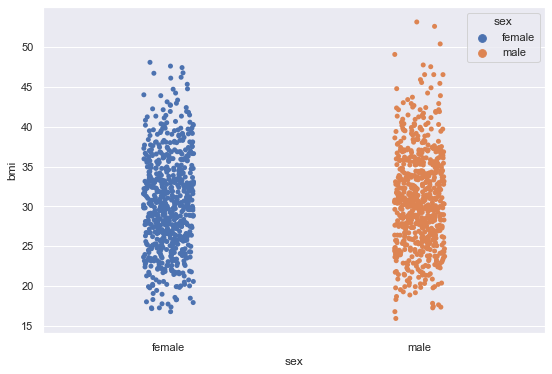

In [24]:
#do the plot and check the data varibility between charges and smkoers
plt.figure(figsize=(9,6))
sns.stripplot(data=insurance_data, x='sex', y='bmi', hue='sex');

**From above plot it looks like BMI between genders not much difference.But is this statically significat need to do hypothesis testing to confirm.**

##### Analysis based on hypothesis test

In [25]:
# two-sample t-test
# Null hypothesis (H0) = "bmi has no effect on gender"
# Alternative Hypotheis(H1) = "bmi has effect on gender"
# Lets consider 5% significance level for hypothesis testing. So Alpha = 0.05
# If p_value ≤ 0.05 then reject H0

# bmi corresponds to male
male_bmi = np.array(insurance_data[insurance_data['sex']=='male']['bmi'])

# bmi corresponds to female
female_bmi = np.array(insurance_data[insurance_data['sex']=='female']['bmi'])

#performing an independant T-test 
t_statistics, p_value = stats.ttest_ind(male_bmi, female_bmi, axis = 0)

print(t_statistics, p_value)

1.696752635752224 0.08997637178984932


The **p_value(0.0899) > 0.05** which indicates that BMI has no effect on gender. So **fail to reject Null hypothesis**

<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">c. Is the proportion of smokers significantly different in different
genders?

In [26]:
pd.crosstab(insurance_data['sex'], insurance_data['smoker'])

smoker,no,yes
sex,,
female,547,115
male,517,159


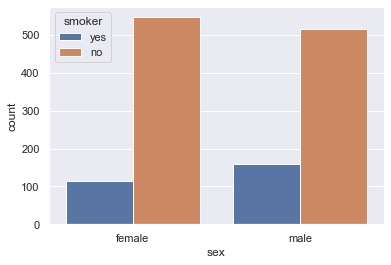

In [27]:
# plot the count plot to show the differnece
sns.countplot(x='sex',hue='smoker',data= insurance_data);


**From the plot it looks like male smoker count it higher side compare to female.But is this statically significat need to do hypothesis testing to confirm.**

##### Analysis based on hypothesis test

In [28]:
#We need to check  proportion of smokers significantly different in different genders

#Null Hypothesis        (H0) = 'proportion of smokers in different genders are equal'<br>
#Alternative Hypothesis (H1) = 'proportion of smokers in different genders are not equal'

In [29]:
#Find the Male and Female smokers from data
#Male smoker counts
male_smokers = insurance_data[insurance_data['sex'] == 'male'].smoker.value_counts().yes

# number of female smokers
female_smokers = insurance_data[insurance_data['sex'] == 'female'].smoker.value_counts().yes

#Number of male and Female in data
n_males = insurance_data.sex.value_counts().male
n_females = insurance_data.sex.value_counts().female

In [30]:
#print the male and female smoker data
print('Total no.of males :', n_males, ' and no.of male smokers are:',male_smokers)
print('Total no.of females :', n_females, ' and no.of female smokers are:',female_smokers)
print(f'Proportion of smokers in females, males = {round(female_smokers/n_females,2)}%, {round(male_smokers/n_males,2)}% respectively')

Total no.of males : 676  and no.of male smokers are: 159
Total no.of females : 662  and no.of female smokers are: 115
Proportion of smokers in females, males = 0.17%, 0.24% respectively


**From the above data, proportions are different but are they statistically significant need to test the hypothesis**

In [31]:
from statsmodels.stats.proportion import proportions_ztest

t_stat, p_value = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

#with 5% significance level
if p_value < 0.05: 
    print(f'With a p-value of {round(p_value,4)} the difference is significant.So We reject the Null Hypothesis(H0).')
    print('So the proportion of smoker significantly different between different genders.')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant.S0 We fail to reject the Null Hypothesis(H1).')
    print('So the proportion of smoker not significantly different between different genders.')

With a p-value of 0.0053 the difference is significant.So We reject the Null Hypothesis(H0).
So the proportion of smoker significantly different between different genders.


<span style="font-family: Arial; font-weight:bold;font-size:1.2em;color:#00b3e5;">d. Is the distribution of bmi across women with no children, one child
and two children, the same?

<AxesSubplot:xlabel='children', ylabel='bmi'>

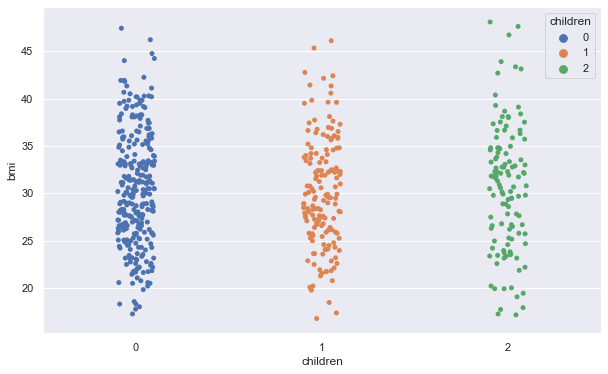

In [32]:
# filter the data set to select only with 0,1 and 2 children
insurance_subset_children = insurance_data[insurance_data['children']<=2]

# filter the data set to select only women with 0,1 and 2 children
insurance_subset_women_children = insurance_subset_children[insurance_subset_children['sex']=='female']

plt.figure(figsize=(10, 6))
sns.stripplot(data=insurance_subset_women_children, x='children', y='bmi', hue='children')

In [33]:
# Null Hypothesis (H0)     = "Number of children has no effect on BMI"
# Alternate hypothesis(H1) = "Number of children has effect on BMI"

zero_chidren = insurance_subset_women_children[insurance_subset_women_children.children == 0]['bmi']
one_chidren  = insurance_subset_women_children[insurance_subset_women_children.children == 1]['bmi']
two_chidren  = insurance_subset_women_children[insurance_subset_women_children.children == 2]['bmi']

In [34]:
f_test, p_value = stats.f_oneway(zero_chidren, one_chidren, two_chidren)
print(f_test, p_value)

0.3344720147757968 0.7158579926754841


In [35]:
if p_value < 0.05:  # Setting our significance level at 5%
    print(f'Number of children has effect on BMI, as the p_value ({p_value.round(3)}) < 0.05, So reject null hypothesis')
else:
    print(f'Number of children has no effect on BMI as the p_value ({p_value.round(3)}) > 0.05. So fail to reject null hypothesis')

Number of children has no effect on BMI as the p_value (0.716) > 0.05. So fail to reject null hypothesis
